## Imports

In [8]:
import pandas as pd
import pandas_datareader as data
import mplfinance as mpf
import matplotlib.pyplot as plt
from matplotlib.dates import DateFormatter,MonthLocator,YearLocator,WeekdayLocator,MONDAY
import yfinance as yf

## Loanding Data

In [9]:
start_date = '2020-01-01'
end_date = '2022-01-01'

ticket = yf.Ticker('^BVSP')
ibov = ticket.history(interval='1d', start=start_date, end=end_date)
ibov.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2020-01-02 00:00:00-03:00,115652.0,118573.0,115649.0,118573.0,5162700,0.0,0.0
2020-01-03 00:00:00-03:00,118564.0,118792.0,117341.0,117707.0,6834500,0.0,0.0
2020-01-06 00:00:00-03:00,117707.0,117707.0,116269.0,116878.0,6570000,0.0,0.0
2020-01-07 00:00:00-03:00,116872.0,117076.0,115965.0,116662.0,4854100,0.0,0.0
2020-01-08 00:00:00-03:00,116667.0,117335.0,115693.0,116247.0,5910500,0.0,0.0


In [10]:
dates = ibov.index
opens = ibov['Open']

## Visualizando os dados com plot_date

In [12]:
years = YearLocator()
months = MonthLocator()
yearsFmt = DateFormatter('%Y')

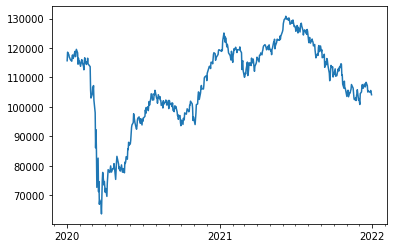

In [14]:
fig , ax = plt.subplots()
ax.plot_date(dates, opens, '-')

# Format the ticks
ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)
ax.autoscale_view()

In [15]:
# Every 3rd month
months = MonthLocator( range(1,13), bymonthday=1, interval=3)
monthsFmt = DateFormatter("%b '%y")
mondays = WeekdayLocator(MONDAY)

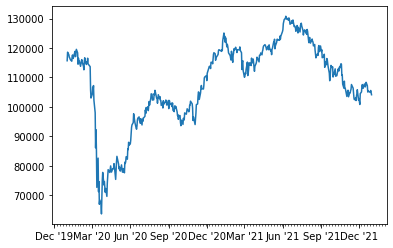

In [16]:
fig , ax = plt.subplots()
ax.plot_date(dates, opens, '-')
ax.xaxis.set_major_locator(months)
ax.xaxis.set_major_formatter(monthsFmt)
ax.xaxis.set_minor_locator(mondays)
ax.autoscale_view()

## Plotando dados personalizados

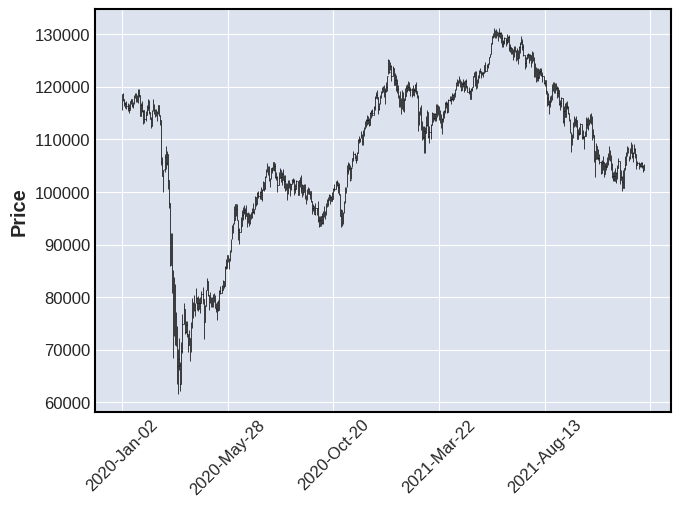

In [17]:
mpf.plot(ibov)

### Plotando dados de máx e mínima

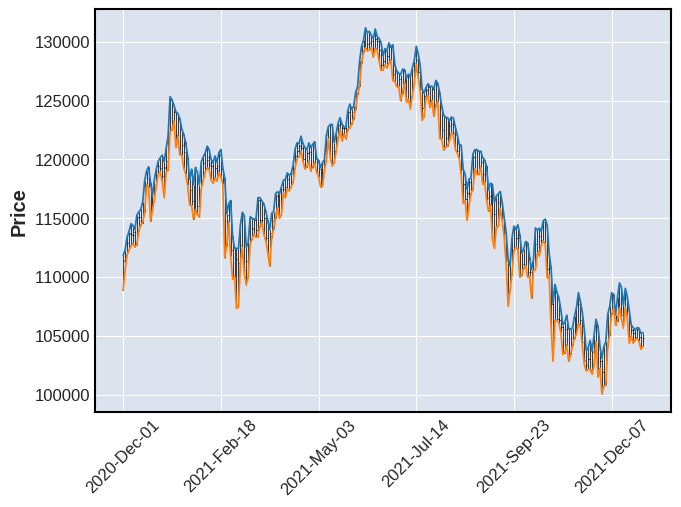

In [18]:
my_plot_max_min = mpf.make_addplot(ibov.loc['2020-12-01':,['High','Low']])
mpf.plot(ibov['2020-12-01':], addplot=my_plot_max_min)

### Plotando gráficos de candle

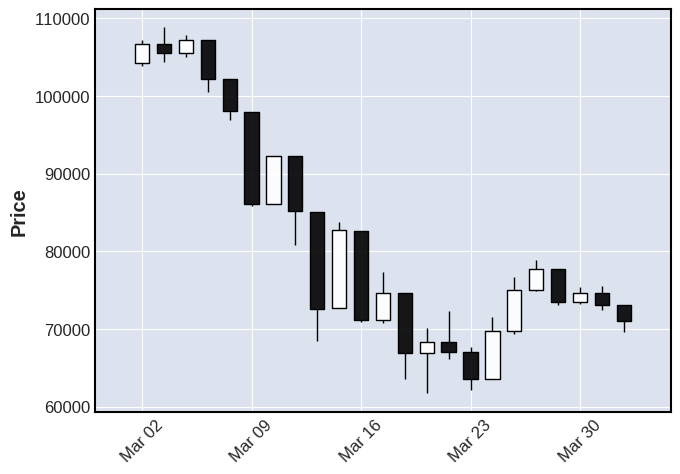

In [19]:
mpf.plot(ibov['2020-03-01':'2020-04-01'], type='candle')

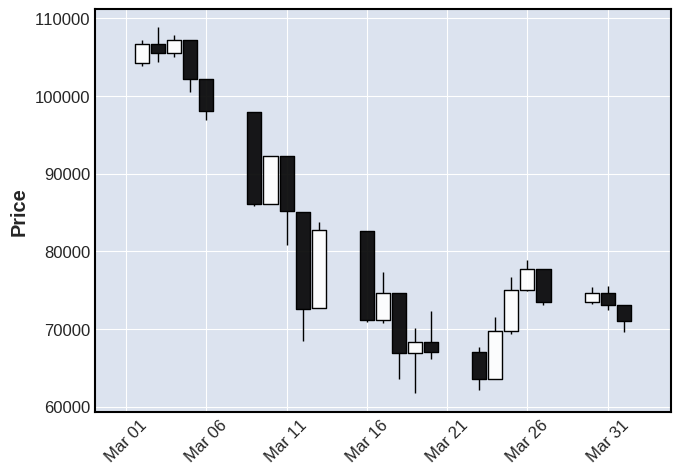

In [20]:
mpf.plot(ibov['2020-03-01':'2020-04-01'], type='candle', show_nontrading=True)

### Plotando dados usando médias móveis e volumes

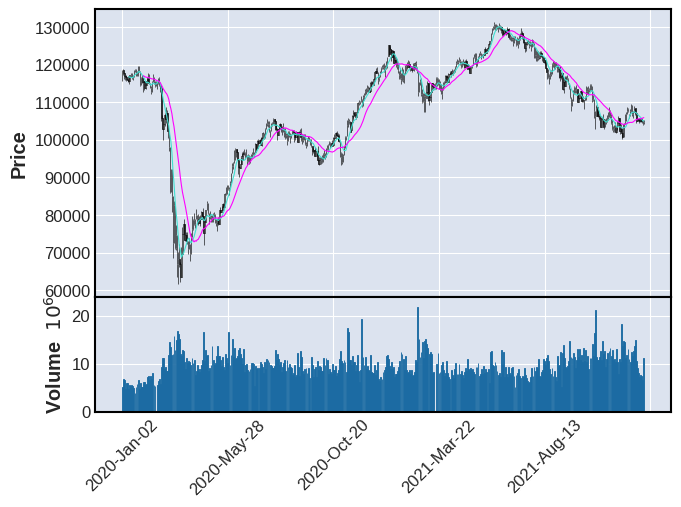

In [21]:
mpf.plot(ibov, type='candle', mav=(7,21), volume=True)

### Modificando os tipos de gráficos

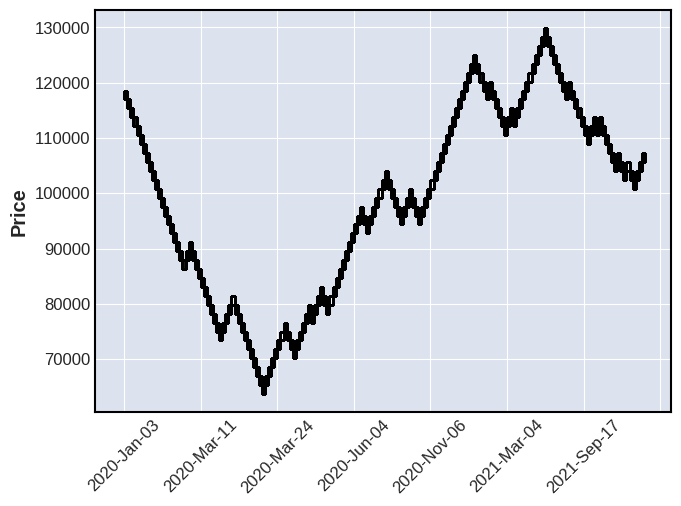

In [22]:
mpf.plot(ibov, type='renko')

### Plotando dados com estilo

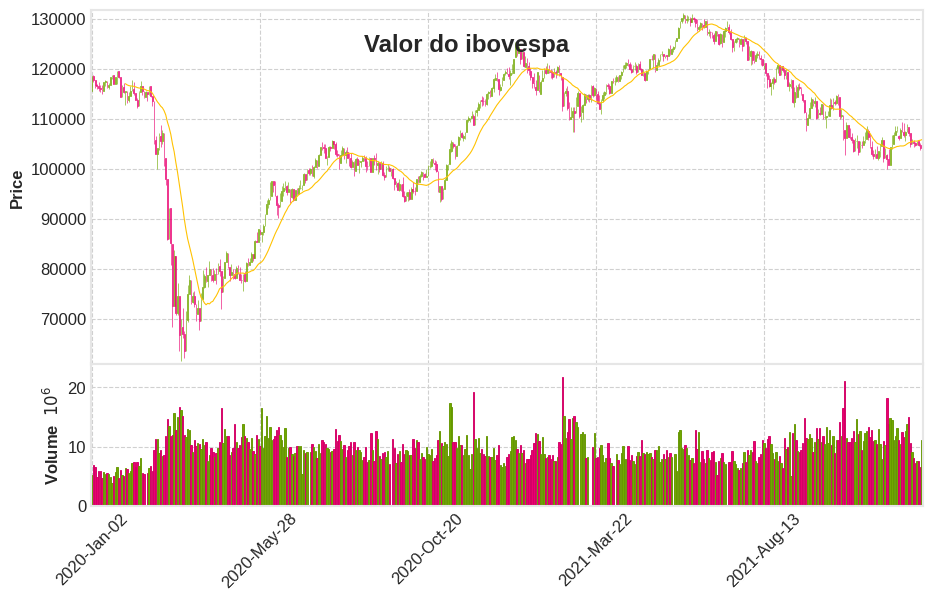

In [23]:
TICKER = 'ibovespa'
mpf.plot(ibov,
         figratio = (10,6),
         type='candle',
         mav=(21),
         volume=True,
         title=f"Valor do {TICKER}",
         tight_layout=True,
         style="binance")

In [24]:
# Consultando estilos
mpf.available_styles()

['binance',
 'blueskies',
 'brasil',
 'charles',
 'checkers',
 'classic',
 'default',
 'ibd',
 'kenan',
 'mike',
 'nightclouds',
 'sas',
 'starsandstripes',
 'yahoo']